<a href="https://colab.research.google.com/github/taemin-hwang/study-space/blob/master/my_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Tensor
* 텐서는 배열이나 행렬과 매우 유사한 자료구조입니다
* PyTorch에서는 텐서를 사용하여 모델의 입력과 출력 그리고 매개변수들을 부호화합니다
* 텐서는 GPU나 TPU에서 실행할 수 있다는 점만 제외하면 Numpy의 ndarray와 유사합니다
* 텐서는 자동 미분 (automatic differentiaion)에 최적화되어있습니다

In [1]:
import torch
import numpy as np

## 텐서 초기화
### 데이터로부터 직접 생성하기

In [2]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

### Numpy 배열로부터 생성하기

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

## 텐서의 속성 (Attribute)
* 텐서의 모양 (shape), 자료형 (datatype) 등

In [6]:
tensor = torch.rand((3, 4))
print("Shape : {}".format(tensor.shape))
print("DType : {}".format(tensor.dtype))
print("Device tensor is stored on  : {}".format(tensor.device))

Shape : torch.Size([3, 4])
DType : torch.float32
Device tensor is stored on  : cpu


## 텐서 연산 (Operation)
* 전치 (transposing)
* 인덱싱 (indexing)
* 슬라이싱 (slicing)
* 수학계산, 선형대수, 임의 샘플링 (random sampling)등
* 각 연산들은 일반적으로 CPU보다 빠른 GPU에서 실행할 수 있습니다
* 기본적으로 텐서는 CPU에 생성됩니다 .to 메소드를 사용하면 GPU로 텐서를 명시적으로 이동할 수 있습니다

In [9]:
# GPU가 존재하면 텐서를 이동합니다
if torch.cuda.is_available():
  print('torch.cuda.is_available() : move tensor to GPU')
  tensor = tensor.to("cuda")

torch.cuda.is_available() : move tensor to GPU


### 산술 연산 (Arithmetic Operations)

In [14]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: An output with one or more elements was resized since it had shape [3, 4], which does not match the required output shape [3, 3].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  after removing the cwd from sys.path.


tensor([[0.3217, 0.0027, 0.2161, 0.4270],
        [0.5450, 0.2550, 0.0527, 0.0325],
        [0.8371, 0.1303, 0.3346, 0.2825]], device='cuda:0')

## Numpy 변환 (Bridge)
* CPU 상의 텐서와 Numpy 배열은 "메모리 공간을 공유"하기 때문에 하나를 변경하면 다른 하나도 변경됩니다

In [16]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
t: [1. 1. 1. 1. 1.]


In [17]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
t: [2. 2. 2. 2. 2.]


### Numpy 배열을 텐서로 변환하기

In [21]:
n = np.ones(5)
t = torch.from_numpy(n)

print(f"t: {t}")
print(f"n: {n}")

n *= 2

print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]




---



# II. Dataset과 DataLoader
* 데이터 샘플을 처리하는 코드는 지저분하고 유지보수가 어려울 수 있습니다
* 더 나은 가독성과 모듈성을 위해 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적입니다
* PyTorch는 torch.utils.data.DataLoader와 torch.utils.data.Dataset의 두 가지 데이터 기본 요소를 제공하여 미리 준비된 데이터 셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 합니다
* Dataset은 샘플과 정답을 저장합니다
* DataLoader는 Dataset을 샘플에 쉽게 접근할 수 있도록 iterable로 감쌉니다

## 데이터셋 불러오기
* TorchVision에서 Fashion-MNIST 데이터셋을 불러오는 예제를 살펴보겠습니다
  * root는 학습/테스트 데이터가 저장되는 경로
  * train은 학습용 또는 테스트용 데이터셋 여부를 지정
  * download=True는 root에 데이터가 없는 경우 인터넷에서 다운로드
  * transform과 target_transform은 특징과 정답 변형을 지정

In [25]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST (
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### 데이터셋을 순회하고 시각화하기
* Dataset에 리스트처럼 직접 접근 (index)할 수 있습니다
  * training_data[index]
* matplotlib을 사용하여 학습데이터의 일부를 시각화해보겠습니다

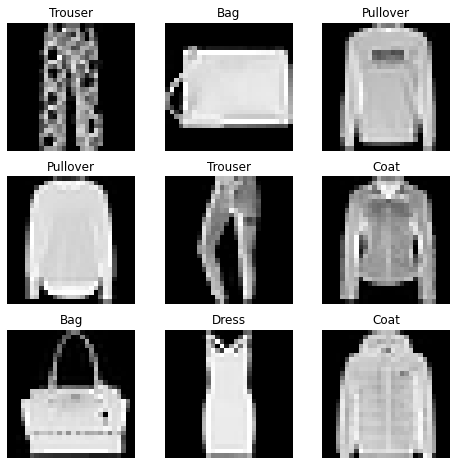

In [29]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 파일에서 사용자 정의 데이터셋 만들기
* 사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 합니다
  * `__init__`
  * `__len__`
  * `__getitem__`

In [31]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)
  
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    print(img_path)
    image = read_image(img_path) # torchvision.io read_image
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_trasnform:
      label = self.target_transform(label)
    return image, label

* `__init__` 함수는 Dataset 객체가 생성될 때 한 번만 실행됩니다
* `__len__` 함수는 데이터셋의 샘플개수를 반환합니다
* `__getitem__` 함수는 주어진 인덱스 `idx`에 해당하는 샘플을 데이터셋에서 불러오고 반환합니다
  * 인덱스를 기반으로, 이미지의 위치를 식별하고
  * `read_image`를 사용하여 이미지를 텐서로 변환하고
  * `self.img_labels`의 csv 데이터로부터 해당하는 정답 (label)을 가져오고, 변형한뒤 텐서이미지와 라벨을 dict 형으로 반환합니다



### DataLoader로 학습용 데이터 준비하기
* Dataset은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다
* 모델을 학습할 때 일반적으로 샘플들을 "미니배치(minibatch)"로 전달하고,
* 매 epoch마다 데이터를 다시 섞어서 과적합(overfit)을 막고
* python의 multiprocessing을 사용하여 데이터 검색 속도를 높이려고 합니다

* `DataLoader`는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체 (iterable)입니다

In [32]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### DataLoader를 통해 순회하기 (iterate)
* DataLoader에 데이터셋을 불러온 뒤에는 필요에 따라 데이터 셋을 순회할 수 있습니다
* 아래의 각 순회 (iteration)는 train_features와 train_labels의 묶음 (batch)을 반환합니다
  * batch_size=64의 특징(feature)와 정답(labels)를 포함
* shuffle=True로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞입니다

In [40]:
train_features, train_labels = next(iter(train_dataloader))

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


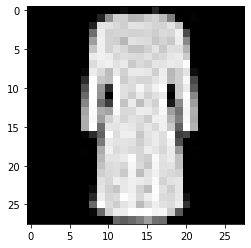

Label: 3


In [45]:
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[1].squeeze() # 0 - 63 indexing
label = train_labels[1] # 0 - 63 indexing

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")



---

# III. 변형 (Transform)
* 데이터가 항상 머신러닝 알고리즘 학습에 필요한 최종 처리가 된 형태로 제공되지는 않습니다
* 변형(transform)을 해서 데이터를 조작하고 학습에 적합하게 만듭니다
* 모든 TorchVision 데이터셋들은 변형 로직을 갖는, 호출 가능한 객체 (callable)를 받는 매개변수 두개 (tranform, target_transform)를 갖습니다
* FashionMNIST 특징(feature)는 PIL Image 형식이며, 정답(label)은 정수입니다
* 학습을 하려면 정규화(normalize)된 텐서의 특징 (feature)과 원-핫(one-hot)으로 부호화(encoding)된 텐서 형태의 정답(label)이 필요합니다
* 이러한 변형을 하기 위해 `ToTensor`와 `Lambda`를 사용합니다

In [48]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## ToTensor()
* `ToTensor`는 PIL Image나 Numpy ndarray를 FloatTensor로 변환하고 이미지의 픽셀의 크기 (intensity) 값을 [0., 1.] 번위로 scaling 합니다

## Lambda 변형 (transform)
* 사용자 정의 람다 함수를 적용합니다
* 여기에서는 정수를 원-핫으로 부호화된 텐서로 바꾸는 함수를 정의합니다
  * 크기 10짜리 zero tensor를 만들고
  * scatter_를 호출하여 주어진 정답 `y`에 해당하는 인덱스에 value=1을 할당합니다

---
# IV. 신경망 모델 구성하기
* 신경망은 데이터에 대한 연산을 구행하는 계층(layer)/모듈(module)로 구성되어 있습니다
* `tensor.nn` 네임스페이스는 신경망을 구성하는데 필요한 모든 구성 요소를 제공합니다}

In [49]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 학습을 위한 장치 얻기
* 가능한 경우 GPU와 같은 하드웨어 가속기에서 모델을 학습하려 합니다
* torch.cuda를 사용할 수 있는지 확인하고 그렇지 않으면 CPU를 계속 사용합니다

In [50]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## 클래스 정의하기
* 신경망 모델을 nn.Module의 하위 클래스로 정의하고,
* `__init__`에서 신경망 계층들을 초기화 합니다
* nn.Module을 상속받은 모든 클래스는 forward 메소드에 입력 데이터에 대한 연산들을 구현합니다

In [57]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

`NeuralNetwork`의 인스턴스를 생성하고 이를 `device`로 이동한뒤, 구조를 출력합니다

In [58]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


* 모델을 사용하기 위해 입력 데이터를 전달합니다
* 이는 백그라운드 연산들과 함께 모델의 `forward`를 실행합니다
  * 직접 `model.forward()`를 호출하지 마세요
* 모델에 입력을 호출하면 각 분류(class)에 대한 raw 예측값이 있는 10-차원 텐서가 반환됩니다
* raw 예측값을 nn.Softmax 모듈의 인스턴스에 통과시켜 예측 확률을 얻습니다

In [59]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class {y_pred}")

Predicted class tensor([2], device='cuda:0')


## 모델 계층 (Layer)
* FashionMNIST 모델의 계층들을 살펴봅니다
* 이를 설명하기 위해 28x28 크기의 이미지 2개로 구성된 미니 배치를 가져오겠습니다

In [60]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


### `nn.Flatten`
* 각 28x28의 2D 이미지를 784 픽셀 값을 갖는 연속된 배열로 변환합니다

In [61]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


### `nn.Linear`
* 저장된 가중치(weight)와 편향(bias)을 사용하여 선형 변환을 적용하는 모듈입니다

In [62]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### `nn.ReLU`
* 비선형 활성화(activation) 모델의 입력과 출력 사이에 복잡한 관계(mapping)를 만듭니다


In [63]:
print(f"Before ReLU : {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU : {hidden1}")

Before ReLU : tensor([[-0.3210,  0.5707, -0.1064,  0.3860,  0.4311, -0.5687, -0.1116, -0.2614,
          0.7400, -0.2164, -0.3215, -0.0868,  0.2036, -0.2449, -0.2767, -0.4486,
          0.5082, -0.4637, -0.2269,  0.2688],
        [-0.4147,  0.2843, -0.0509,  0.5132,  0.2956, -0.7899, -0.2454, -0.0440,
          0.5449, -0.3892, -0.5226, -0.3429,  0.4544, -0.2590, -0.0900, -0.6116,
          0.0295, -0.2797, -0.0232, -0.0306],
        [-0.5801,  0.3525,  0.0756, -0.0250,  0.2467, -0.4068, -0.3609, -0.1134,
          0.5865, -0.2587, -0.2291,  0.2737,  0.3533, -0.5159,  0.1645, -0.1513,
          0.1620, -0.7737, -0.1091,  0.0810]], grad_fn=<AddmmBackward0>)


After ReLU : tensor([[0.0000, 0.5707, 0.0000, 0.3860, 0.4311, 0.0000, 0.0000, 0.0000, 0.7400,
         0.0000, 0.0000, 0.0000, 0.2036, 0.0000, 0.0000, 0.0000, 0.5082, 0.0000,
         0.0000, 0.2688],
        [0.0000, 0.2843, 0.0000, 0.5132, 0.2956, 0.0000, 0.0000, 0.0000, 0.5449,
         0.0000, 0.0000, 0.0000, 0.4544, 0.0000, 0.

### `nn.Sequential`
* 순서를 갖는 모듈의 컨테이너 입니다
* 순차 컨테이너를 사용하여 아래의 seq_modules와 같은 신경망을 빠르게 만들 수 있습니다

In [64]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)

input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

### `nn.Softmax`
* 신경망의 마지막 선형 계층은 nn.Softmax 모듈에 전달된 logits을 반환합니다
* logits는 모델의 각 분류(class)에 대한 예측 확률을 나타내도록 조정됩니다

In [65]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

---

# V. 모델 매개변수 최적화하기 (Optimization)
* 모델과 데이터가 준비되면 모델을 학습하고, 검증하고, 테스트할 차례
* 모델 학습 과정은 반복 과정을 거칩니다 (epoch)
  * 출력을 추축
  * 추측과 정답 사이의 오류(손실)를 계산
  * 매개변수에 대한 오류 도함수를 수집
  * 경사하강법을 통해 파라미터를 최적화

## 기본 (pre-requisite) 코드

In [68]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork()

## 하이퍼파라미터 (Hyper-parameter)
* 모델 최적화 과정을 제어할 수 있는 조절가능한 매개변수
  * epoch: 데이터셋을 반복하는 횟수
  * batch size: 매개변수가 갱신되기 전 신경망을 통해 전파된 데이터 샘플의 수
  * learning rate: 값이 작을수록 학습 속도가 느려지고, 값이 클 수록 예측하기 어려운 동작이 발생함

In [69]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## 최적화 단계 (Optimization)
* 하나의 에폭은 다음의 두 부분으로 구성
  * 학습 단계 (train loop): 학습용 데이터셋을 반복하고 최적의 매개변수로 수렴
  * 검증/테스트 단계 (validataion/test loop): 모델 성능이 개선되고 있는지를 확인하기 위해 테스트 데이터 셋을 반복

## 손실 함수 (Loss function)
* 손실 함수는 획득한 결과와 실제 값 사이의 틀린 정도 (degree of dissimilarity)를 측정하며, 학습 중에 이 값을 최소화 하려고 함
* 일반적인 손실함수에는
  * 회귀 문제(regression task)에 사용하는 `nn.MESLoss`(평균 제곱 오차)
  * 분류 문제(classification)에 사용하는 `nn.NLLoss`(음의 로그 우도(Negative Log Likelihood)
  * 그리고 `nn.LogSoftmax`와 `nn.NLLoss`를 합친 `nn.CrossEntropyLoss`등이 있습니다

In [70]:
loss_fn = nn.CrossEntropyLoss()

### 옵티마이저 (Optimizer)
* 최적화 알고리즘은 이 과정이 수행되는 방식 (여기에서는 SGD; Stochastic Gradient Descent)
* 모든 최적화 절차 (logic)는 optimizer 객체에 캡슐화 됩니다
* 여기서는 SGD 옵티마이저를 사용하고 있으며, PyTorch에는 ADAM이나 RMSProp과 같은 다양한 옵티마이저가 있습니다

In [71]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

학습 단계(loop)에서 최적화는 세 단계로 이뤄집니다
* `optimizer.zero_grad()`를 호출하여 모델 매개변수의 변화도를 재설정합니다
  * 기본적으로 변화도는 더해지기(add up)때문에 반복할 때마다 명시적으로 0으로 설정합니다
* `loss.backwards()`를 호출하여 예측 손실(prediction loss)을 역전파합니다
* 변화도를 계산한 뒤에는 `optimizer.step()`을 호출하여 매개변수를 조정합니다

## 전체 구현

In [76]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    # calculate prediction and loss
    pred = model(X)
    loss = loss_fn(pred, y)

    # back-propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
      for X, y in dataloader:
          pred = model(X)
          test_loss += loss_fn(pred, y).item()
          correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [77]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.174180 [    0/60000]
loss: 2.165050 [ 6400/60000]
loss: 2.112647 [12800/60000]
loss: 2.131448 [19200/60000]
loss: 2.070038 [25600/60000]
loss: 2.024094 [32000/60000]
loss: 2.051590 [38400/60000]
loss: 1.977994 [44800/60000]
loss: 1.985089 [51200/60000]
loss: 1.909060 [57600/60000]
Test Error: 
 Accuracy: 59.1%, Avg loss: 1.910832 

Epoch 2
-------------------------------
loss: 1.942696 [    0/60000]
loss: 1.913199 [ 6400/60000]
loss: 1.808179 [12800/60000]
loss: 1.846999 [19200/60000]
loss: 1.722490 [25600/60000]
loss: 1.687854 [32000/60000]
loss: 1.705100 [38400/60000]
loss: 1.610773 [44800/60000]
loss: 1.630824 [51200/60000]
loss: 1.520256 [57600/60000]
Test Error: 
 Accuracy: 60.6%, Avg loss: 1.544536 

Epoch 3
-------------------------------
loss: 1.609493 [    0/60000]
loss: 1.571679 [ 6400/60000]
loss: 1.435582 [12800/60000]
loss: 1.498645 [19200/60000]
loss: 1.363428 [25600/60000]
loss: 1.375272 [32000/60000]
loss: 1.379263 [38400/

In [101]:
images, label = next(iter(test_dataloader))
output = model(images)
pred_probab = nn.Softmax(dim=1)(output)
y_pred = pred_probab.argmax(1)

print(y_pred)
print(label)

print("Accuracy : ", np.sum(y_pred.numpy() == label.numpy())/y_pred.size()*100)

tensor([9, 2, 1, 1, 6, 1, 6, 4, 7, 7, 2, 5, 7, 3, 4, 1, 2, 2, 8, 0, 6, 7, 7, 7,
        1, 2, 4, 3, 9, 3, 8, 8, 3, 3, 8, 0, 7, 7, 7, 9, 0, 1, 3, 9, 4, 9, 6, 1,
        4, 2, 6, 2, 7, 6, 4, 6, 8, 4, 8, 0, 7, 7, 8, 5])
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])
Accuracy :  [62.5]
